In [178]:
import glob
import pandas as pd

def read_all_csvs_into_pandas(fpath:str)->pd.DataFrame:
    #Get the list of all csv files in the directory "fpath"
    csv_files = glob.glob(fpath)

    # Create an empty dataframe to store the combined data
    df_combined = pd.DataFrame()

    # Loop through each CSV file and append its contents to the combined dataframe
    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        df_combined = pd.concat([df_combined, df]).reset_index(drop=True)
    
    return df_combined

In [179]:
def transform_text_to_list(hist:str)->list[str]:
    return hist.\
        replace('\n', ' ').\
        replace("'", ' ').\
        replace("[", ' ').\
        replace("]", ' ').\
        replace(",", ' ').\
        strip().split()

In [180]:
def convert_type_of_all_list(l:list, dtype=int):
    return list(map(dtype,l))

In [181]:
FPATH_ITEMS = '../data/items_reduced/*.csv'
df_items = read_all_csvs_into_pandas(FPATH_ITEMS)

In [182]:
FPATH_TRAIN = '../data/train_reduced/*.csv'
df_train = read_all_csvs_into_pandas(FPATH_TRAIN)

In [183]:
df_train.head(1)

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"c8aab885-433d-4e46-8066-479f40ba7fb2, 68d2039c...","1657146417045, 1657146605778, 1657146698738","76, 38, 41","20380, 21184, 35438","50.3, 18.18, 16.46","2, 1, 1","1657146417045, 1657146605778, 1657146698738"


In [184]:
print(transform_text_to_list(df_train["timestampHistory"].iloc[0]))
print(convert_type_of_all_list(transform_text_to_list(df_train["timestampHistory"].iloc[0])))

['1657146417045', '1657146605778', '1657146698738']
[1657146417045, 1657146605778, 1657146698738]


In [185]:
def explode_columns(df:pd.DataFrame, cols_to_transform):
    for col in cols_to_transform:
        df[col] = df[col].apply(transform_text_to_list)
    return df.explode(cols_to_transform, ignore_index=True)

In [186]:
cols_to_explode = ["history", "numberOfClicksHistory", "timeOnPageHistory", "scrollPercentageHistory", "pageVisitsCountHistory"]
# cols_to_explode = ["history"]
cols_and_id = cols_to_explode.copy()
cols_and_id.insert(0,"userId")
cols_and_id = tuple(cols_and_id)
print(cols_and_id)

('userId', 'history', 'numberOfClicksHistory', 'timeOnPageHistory', 'scrollPercentageHistory', 'pageVisitsCountHistory')


In [187]:
exploded_df = explode_columns(df_train.loc[:,cols_and_id], cols_to_explode)

In [188]:
exploded_df

,userId,history,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,c8aab885-433d-4e46-8066-479f40ba7fb2,76,20380,50.3,2
1,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,68d2039c-c9aa-456c-ac33-9b2e8677fba7,38,21184,18.18,1
2,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,13e423ce-1d69-4c78-bc18-e8c8f7271964,41,35438,16.46,1
3,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,3325b5a1-979a-4cb3-82b6-63905c9edbe8,7,6049,25.35,1
4,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,fe856057-f97d-419f-ab1c-97c5c3e0719c,80,210489,45.66,1
...,...,...,...,...,...,...
428356,c83b95712b4e2fd9bab7af5733d244680146355e2f8077...,f672d64f-6d2c-4c4c-8936-3a797683dd9e,0,50000,42.68,1
428357,5e1fe85101f303417768a5572f454da3dc15e645a85a12...,a289fde1-2ea9-4c18-a489-b8ad09c6a3dd,0,5492,8.18,1
428358,5e1fe85101f303417768a5572f454da3dc15e645a85a12...,e956323c-e672-4053-808a-c434b27cf613,1,38924,14.93,2
428359,5e1fe85101f303417768a5572f454da3dc15e645a85a12...,aa9d932a-7045-402d-80a9-431d1f17e0e8,1,17806,21.97,1


In [189]:
def check_df_size(df, exploded_df):
    return exploded_df.shape[0] == df["historySize"].sum().item()

In [190]:
check_df_size(df_train, exploded_df)

True

In [191]:

exploded_df['userId'] = exploded_df['userId'].astype('str')
exploded_df['history'] = exploded_df['history'].astype('str')
exploded_df['numberOfClicksHistory'] = exploded_df['numberOfClicksHistory'].astype('int16')
exploded_df['timeOnPageHistory'] = exploded_df['timeOnPageHistory'].astype('int64')
exploded_df['scrollPercentageHistory'] = exploded_df['scrollPercentageHistory'].astype('float32')
exploded_df['pageVisitsCountHistory'] = exploded_df['pageVisitsCountHistory'].astype('int16')

In [192]:
exploded_df.describe()

,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
count,428361.000000,4.283610e+05,428361.000000,428361.000000
mean,11.669926,8.964318e+04,78.436554,1.149570
std,35.366900,1.206196e+05,3487.049805,1.375888
min,0.000000,5.000000e+03,0.660000,1.000000
25%,0.000000,3.000000e+04,27.420000,1.000000
50%,1.000000,6.000000e+04,43.340000,1.000000
75%,13.000000,1.152410e+05,60.029999,1.000000
max,8916.000000,1.442440e+07,498961.468750,211.000000


In [193]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428361 entries, 0 to 428360
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   userId                   428361 non-null  object 
 1   history                  428361 non-null  object 
 2   numberOfClicksHistory    428361 non-null  int16  
 3   timeOnPageHistory        428361 non-null  int64  
 4   scrollPercentageHistory  428361 non-null  float32
 5   pageVisitsCountHistory   428361 non-null  int16  
dtypes: float32(1), int16(2), int64(1), object(2)
memory usage: 13.1+ MB


In [194]:
exploded_df.isnull().sum()

userId                     0
history                    0
numberOfClicksHistory      0
timeOnPageHistory          0
scrollPercentageHistory    0
pageVisitsCountHistory     0
dtype: int64

In [195]:
exploded_df.userId.nunique()

30015

In [196]:
exploded_df.history.nunique()

56683

In [197]:
exploded_df["history"].value_counts().head(100)

history
d2593c3d-2347-40d9-948c-b6065e8459a9    1331
f6b5d170-48b9-4f8e-88d4-c84b6668f3bd    1148
1f32787b-de2b-49be-8c20-ddaeae34cc22    1019
6a83890a-d9e9-4f6b-a6c6-90d031785bbf    1017
f0a78e58-ec7e-494c-9462-fbd6446a9a89     960
                                        ... 
3936f6c7-3f6c-4205-8cda-3178160b6cd4     415
a8f0cda0-6c9c-45f6-b72a-3c20ba9624ea     415
8956c97a-6d85-4d4b-a6f7-6d42c6be97cc     414
b4a5680b-d0e1-4260-bc54-82fbe328d3a0     412
e22473a3-7a8a-46cb-8c86-1bda7a5c70de     412
Name: count, Length: 100, dtype: int64

In [198]:
rare_counts_threshold = 100

comment_counts = pd.DataFrame(exploded_df["history"].value_counts())
rare_news = comment_counts[exploded_df["history"].value_counts() <= rare_counts_threshold].index
common_news:pd.DataFrame = exploded_df[~exploded_df["history"].isin(rare_news)]

In [199]:
print(exploded_df.shape[0], common_news.shape[0])

428361 195414


In [200]:
common_news["history"].value_counts().head(100000)

history
d2593c3d-2347-40d9-948c-b6065e8459a9    1331
f6b5d170-48b9-4f8e-88d4-c84b6668f3bd    1148
1f32787b-de2b-49be-8c20-ddaeae34cc22    1019
6a83890a-d9e9-4f6b-a6c6-90d031785bbf    1017
f0a78e58-ec7e-494c-9462-fbd6446a9a89     960
                                        ... 
1e40bffe-f7f4-413c-b334-6de3db3d2c24     101
047cf8f8-9ced-49ad-b159-4879ae1573c9     101
f5b99f2a-b4b9-4886-8d95-9788df19ca13     101
f13bf60f-17b5-4443-9513-c52e7a933bac     101
f9c9a66c-d870-44f9-a27e-395934431b7f     101
Name: count, Length: 841, dtype: int64

In [201]:
user_item_matrix = common_news.pivot(index='userId', columns='history', values='numberOfClicksHistory')

In [202]:
user_item_matrix

history,008d7a48-0864-4202-9a4e-b5d4f3c08e8b,02910a33-93ba-49fb-9bfa-f8db58520cdb,02953bf6-d721-47d9-a2de-f01114449756,029c4dd9-4231-469e-8eca-3de5f05ea046,02e4c8f2-12ac-45bd-82ee-06db6fa15b50,0305a46a-fe62-4666-9742-f5fe5db890ab,0306487b-37be-4eda-bd8e-ad0a60886480,037155f4-4db8-4f07-8d0a-3e559605b8ad,0396f828-3984-44ec-95aa-511dbb40fa88,039eca3d-3894-4309-845c-ae42cfa599f1,...,fec5cf7f-1039-43b2-8eee-e51c642f3b62,feee3eb1-d625-4766-9da5-d855ac2f557c,ff24f030-abbe-420a-b29e-de6794ec8fca,ff26f5dd-71d1-4364-940b-8647e048a209,ff3e8c61-d72a-42bf-a84a-ecf5409468dd,ff6e7987-c84d-4147-8de1-e8acf8a93df7,ff872490-bef6-4c14-b5ec-66ac9d24ad19,ffabc550-b315-4070-94b6-713712da8ec2,ffe56be2-f822-44ac-b7c2-6bef6e8833a6,ffeea3a6-d969-4a9a-baf0-101da68da3f9
userId,,,,,,,,,,,,,,,,,,,,,
000e8aac7789ab9e01c7e45e2b5f8b528792b36aabf2ea519a934c9cbb22bc68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011b0b55d5dcd5dbd74b38dd6f79b7271ca49282c2ee8f48cc7183a0496b381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002fbe018ce8d497330d1f8d363aeebeae6baba12894ae5439b79c0001acbb98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0030e3d72f6d85d09c0e2e0bc9410f322f9d97877e1c6da205deb8074d297007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe733c3513bf64c819689f2a8cc4d68398b0fb0053c64868ef01b4075656836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffe9909351d3e09950231e26867616f9c75725b3df622cb7cf5c3c10f9aa2d14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffecb603a24436d55cedaf64bf781cac2db5f60e10c1d3cdeaf600b4048da220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
count_clicks = pd.DataFrame(user_item_matrix.fillna(0).astype(bool).sum(axis=1),columns=["counts"])


In [204]:
count_clicks

,counts
userId,
000e8aac7789ab9e01c7e45e2b5f8b528792b36aabf2ea519a934c9cbb22bc68,3
0011b0b55d5dcd5dbd74b38dd6f79b7271ca49282c2ee8f48cc7183a0496b381,0
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,10
002fbe018ce8d497330d1f8d363aeebeae6baba12894ae5439b79c0001acbb98,2
0030e3d72f6d85d09c0e2e0bc9410f322f9d97877e1c6da205deb8074d297007,4
...,...
ffe733c3513bf64c819689f2a8cc4d68398b0fb0053c64868ef01b4075656836,3
ffe9909351d3e09950231e26867616f9c75725b3df622cb7cf5c3c10f9aa2d14,2
ffecb603a24436d55cedaf64bf781cac2db5f60e10c1d3cdeaf600b4048da220,10


In [205]:
count_clicks.describe()

,counts
count,11058.00000
mean,11.24471
std,22.75205
min,0.00000
25%,1.00000
50%,2.00000
75%,10.00000
max,305.00000


In [206]:
user_item_matrix2 = pd.merge(count_clicks, user_item_matrix, on="userId", how="inner")

In [207]:
user_item_matrix2

,counts,008d7a48-0864-4202-9a4e-b5d4f3c08e8b,02910a33-93ba-49fb-9bfa-f8db58520cdb,02953bf6-d721-47d9-a2de-f01114449756,029c4dd9-4231-469e-8eca-3de5f05ea046,02e4c8f2-12ac-45bd-82ee-06db6fa15b50,0305a46a-fe62-4666-9742-f5fe5db890ab,0306487b-37be-4eda-bd8e-ad0a60886480,037155f4-4db8-4f07-8d0a-3e559605b8ad,0396f828-3984-44ec-95aa-511dbb40fa88,...,fec5cf7f-1039-43b2-8eee-e51c642f3b62,feee3eb1-d625-4766-9da5-d855ac2f557c,ff24f030-abbe-420a-b29e-de6794ec8fca,ff26f5dd-71d1-4364-940b-8647e048a209,ff3e8c61-d72a-42bf-a84a-ecf5409468dd,ff6e7987-c84d-4147-8de1-e8acf8a93df7,ff872490-bef6-4c14-b5ec-66ac9d24ad19,ffabc550-b315-4070-94b6-713712da8ec2,ffe56be2-f822-44ac-b7c2-6bef6e8833a6,ffeea3a6-d969-4a9a-baf0-101da68da3f9
userId,,,,,,,,,,,,,,,,,,,,,
000e8aac7789ab9e01c7e45e2b5f8b528792b36aabf2ea519a934c9cbb22bc68,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011b0b55d5dcd5dbd74b38dd6f79b7271ca49282c2ee8f48cc7183a0496b381,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002fbe018ce8d497330d1f8d363aeebeae6baba12894ae5439b79c0001acbb98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0030e3d72f6d85d09c0e2e0bc9410f322f9d97877e1c6da205deb8074d297007,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffe733c3513bf64c819689f2a8cc4d68398b0fb0053c64868ef01b4075656836,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffe9909351d3e09950231e26867616f9c75725b3df622cb7cf5c3c10f9aa2d14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffecb603a24436d55cedaf64bf781cac2db5f60e10c1d3cdeaf600b4048da220,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
user_item_matrix2["counts"]

userId
000e8aac7789ab9e01c7e45e2b5f8b528792b36aabf2ea519a934c9cbb22bc68     3
0011b0b55d5dcd5dbd74b38dd6f79b7271ca49282c2ee8f48cc7183a0496b381     0
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef    10
002fbe018ce8d497330d1f8d363aeebeae6baba12894ae5439b79c0001acbb98     2
0030e3d72f6d85d09c0e2e0bc9410f322f9d97877e1c6da205deb8074d297007     4
                                                                    ..
ffe733c3513bf64c819689f2a8cc4d68398b0fb0053c64868ef01b4075656836     3
ffe9909351d3e09950231e26867616f9c75725b3df622cb7cf5c3c10f9aa2d14     2
ffecb603a24436d55cedaf64bf781cac2db5f60e10c1d3cdeaf600b4048da220    10
fffaaa464d8e2979eff2303842c16a470813c035591c6e9a995de837176989c8     2
fffbce6f9d91169160ed2ddc4919719baec7fce11492b90770063b1ff441f1d1     7
Name: counts, Length: 11058, dtype: int64

In [209]:
user_item_count_threshold = 5

user_item_matrix3 = user_item_matrix2[user_item_matrix2["counts"] > user_item_count_threshold]

In [210]:
user_item_matrix3

,counts,008d7a48-0864-4202-9a4e-b5d4f3c08e8b,02910a33-93ba-49fb-9bfa-f8db58520cdb,02953bf6-d721-47d9-a2de-f01114449756,029c4dd9-4231-469e-8eca-3de5f05ea046,02e4c8f2-12ac-45bd-82ee-06db6fa15b50,0305a46a-fe62-4666-9742-f5fe5db890ab,0306487b-37be-4eda-bd8e-ad0a60886480,037155f4-4db8-4f07-8d0a-3e559605b8ad,0396f828-3984-44ec-95aa-511dbb40fa88,...,fec5cf7f-1039-43b2-8eee-e51c642f3b62,feee3eb1-d625-4766-9da5-d855ac2f557c,ff24f030-abbe-420a-b29e-de6794ec8fca,ff26f5dd-71d1-4364-940b-8647e048a209,ff3e8c61-d72a-42bf-a84a-ecf5409468dd,ff6e7987-c84d-4147-8de1-e8acf8a93df7,ff872490-bef6-4c14-b5ec-66ac9d24ad19,ffabc550-b315-4070-94b6-713712da8ec2,ffe56be2-f822-44ac-b7c2-6bef6e8833a6,ffeea3a6-d969-4a9a-baf0-101da68da3f9
userId,,,,,,,,,,,,,,,,,,,,,
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003f5da43f95f68b2eb8939686a12f1c357f811bb81b3108ad0f9066fe07e4d2,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006640e54d2c292aa1a507d2988bb91498b62070763efc35e6d3624084e53ea4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006a66a70990c1f929d1d8c5a80ef3702ca1574f0428f15b608af71acfbcbaa1,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006d975ed38194372d1998167b874f055192f9f7115999edb1963eb31f6e9b26,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6ce3eebbb80fe650629ae05480bfb9e78cf90f562a0c49934f6054c79166f3,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ffd8a476ee9846b6bcc47696001615cd75b756f7cb2ccfad2ab51fc49da1bf26,81,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffe133162533bd67689c667be6c302b7342f8a682d28d7ad09977b6a8216c8c8,214,6.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
user_item_matrix4 = user_item_matrix3.drop(columns=["counts"])

In [212]:
count_clicks4 = pd.DataFrame(user_item_matrix4.fillna(0).astype(bool).sum(axis=1),columns=["counts"])

In [213]:
user_item_matrix4

,008d7a48-0864-4202-9a4e-b5d4f3c08e8b,02910a33-93ba-49fb-9bfa-f8db58520cdb,02953bf6-d721-47d9-a2de-f01114449756,029c4dd9-4231-469e-8eca-3de5f05ea046,02e4c8f2-12ac-45bd-82ee-06db6fa15b50,0305a46a-fe62-4666-9742-f5fe5db890ab,0306487b-37be-4eda-bd8e-ad0a60886480,037155f4-4db8-4f07-8d0a-3e559605b8ad,0396f828-3984-44ec-95aa-511dbb40fa88,039eca3d-3894-4309-845c-ae42cfa599f1,...,fec5cf7f-1039-43b2-8eee-e51c642f3b62,feee3eb1-d625-4766-9da5-d855ac2f557c,ff24f030-abbe-420a-b29e-de6794ec8fca,ff26f5dd-71d1-4364-940b-8647e048a209,ff3e8c61-d72a-42bf-a84a-ecf5409468dd,ff6e7987-c84d-4147-8de1-e8acf8a93df7,ff872490-bef6-4c14-b5ec-66ac9d24ad19,ffabc550-b315-4070-94b6-713712da8ec2,ffe56be2-f822-44ac-b7c2-6bef6e8833a6,ffeea3a6-d969-4a9a-baf0-101da68da3f9
userId,,,,,,,,,,,,,,,,,,,,,
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003f5da43f95f68b2eb8939686a12f1c357f811bb81b3108ad0f9066fe07e4d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006640e54d2c292aa1a507d2988bb91498b62070763efc35e6d3624084e53ea4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006a66a70990c1f929d1d8c5a80ef3702ca1574f0428f15b608af71acfbcbaa1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006d975ed38194372d1998167b874f055192f9f7115999edb1963eb31f6e9b26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff6ce3eebbb80fe650629ae05480bfb9e78cf90f562a0c49934f6054c79166f3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ffd8a476ee9846b6bcc47696001615cd75b756f7cb2ccfad2ab51fc49da1bf26,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ffe133162533bd67689c667be6c302b7342f8a682d28d7ad09977b6a8216c8c8,6.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
count_clicks4

,counts
userId,
0026e502f6d599d6c57669cff722b0a4a10ab3c6341295ffdbf5d4d2595c60ef,10
003f5da43f95f68b2eb8939686a12f1c357f811bb81b3108ad0f9066fe07e4d2,19
006640e54d2c292aa1a507d2988bb91498b62070763efc35e6d3624084e53ea4,14
006a66a70990c1f929d1d8c5a80ef3702ca1574f0428f15b608af71acfbcbaa1,19
006d975ed38194372d1998167b874f055192f9f7115999edb1963eb31f6e9b26,9
...,...
ff6ce3eebbb80fe650629ae05480bfb9e78cf90f562a0c49934f6054c79166f3,14
ffd8a476ee9846b6bcc47696001615cd75b756f7cb2ccfad2ab51fc49da1bf26,81
ffe133162533bd67689c667be6c302b7342f8a682d28d7ad09977b6a8216c8c8,214


In [215]:
user_item_matrix_np = user_item_matrix4.to_numpy(na_value=0.0)

In [216]:
user_item_matrix_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [6., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(3870, 841))

In [217]:
import numpy as np
np.count_nonzero(user_item_matrix_np)

113089

In [218]:
import numpy as np

def sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations):
    # num_factors: Number of latent factors to use. Higher values can capture more nuanced patterns but risk overfitting.
    # learning_rate: Controls the step size during optimization. Too high can cause overshooting, too low can lead to slow convergence.
    # regularization: Helps prevent overfitting by penalizing large parameter values.
    
    num_users, num_items = user_item_matrix.shape
    errors = []  # To store RMSE after each iteration
    amax = 1e+6
    emax = 1e+3

    # Initialize user and item latent factor matrices with small random values
    print("init user and item latent factors")
    user_factors = np.random.normal(scale=1./num_factors, size=(num_users, num_factors))
    item_factors = np.random.normal(scale=1./num_factors, size=(num_items, num_factors))
    
    # Iterate over the specified number of iterations
    for iteration in range(iterations):
        total_error = 0
        # Loop through all user-item pairs
        for u in range(num_users):
            # print(f'user = {u}')
            for i in range(num_items):
                #  print(f'item = {i}')
                # Only update factors for user-item pairs with interaction
                if user_item_matrix[u, i] > 0:
                    # Compute the prediction error
                    error = np.float64(user_item_matrix[u, i] - np.dot(user_factors[u, :], item_factors[i, :].T))
                    error = np.nan_to_num(error,copy=True,nan=1,posinf=emax,neginf=-emax)
                    total_error += error**2
                    # Update rules for user and item factors
                    user_factors[u, :] += learning_rate * (error * item_factors[i, :] - regularization * user_factors[u, :])
                    user_factors[u, :] = np.nan_to_num(user_factors[u, :],copy=True,nan=0.0,posinf=amax,neginf=-amax)
                    item_factors[i, :] += learning_rate * (error * user_factors[u, :] - regularization * item_factors[i, :])
                    item_factors[i, :] = np.nan_to_num(item_factors[i, :],copy=True,nan=0.0,posinf=amax,neginf=-amax)
        # Calculate RMSE for current iteration
        rmse = np.sqrt(total_error / np.count_nonzero(user_item_matrix))
        errors.append(rmse)

    return user_factors, item_factors, errors

def predict(user_factors, item_factors):
    """Predict the user-item interactions."""
    return np.dot(user_factors, item_factors.T)

In [219]:
# Example usage parameters
num_factors = 30  # Number of latent factors
learning_rate = 0.0001  # Learning rate for SGD
regularization = 0.01  # Regularization parameter
iterations = 400  # Number of iterations

# Apply SGD ALS
# user_factors, item_factors, errors = sgd_als(user_item_matrix, num_factors, learning_rate, regularization, iterations)
user_factors, item_factors, errors = sgd_als(user_item_matrix_np, num_factors, learning_rate, regularization, iterations)
# Predict interactions
predictions = predict(user_factors, item_factors)

init user and item latent factors


In [220]:
np.count_nonzero(np.nan_to_num(predictions))

3254670

In [223]:
user_factors

array([[ 1.64152116, -2.05107494, -0.16075554, ...,  0.75137472,
         1.03446631,  1.68634344],
       [ 1.10936965, -0.09913593, -2.04341837, ...,  1.13921994,
         0.60297173, -1.57585315],
       [ 0.19897337, -1.08773682, -1.05017996, ..., -0.57413188,
        -0.50737542, -0.21824668],
       ...,
       [ 0.97533444, -0.14460586, -1.08834492, ...,  0.22250364,
        -0.79888185,  0.3019496 ],
       [ 2.19200211,  1.75000381, -3.17504449, ..., -1.30775145,
         0.45678952,  1.64883144],
       [ 0.04523054, -0.01858476, -0.05353403, ...,  0.02571992,
         0.03091527,  0.0067282 ]], shape=(3870, 30))

In [224]:
item_factors

array([[ 1.78306792,  0.82831908, -1.71201979, ...,  1.6069795 ,
        -0.04033207,  2.34540457],
       [-1.87221574, -2.04597171,  3.83049811, ...,  2.6696373 ,
        -3.89509178, -2.60326741],
       [ 4.58061642,  1.2241308 , -0.48953854, ...,  4.71487013,
         1.65873446,  1.61437003],
       ...,
       [ 6.42824057, -3.68208257, -1.22542766, ...,  0.96652572,
        -1.216097  , -2.86869842],
       [ 2.72181533, -4.42349147, -3.55237545, ...,  1.72053697,
        -0.96680264,  0.46886753],
       [ 4.17744459, -2.72246013, -1.09302162, ..., -3.2263037 ,
        -3.05333154,  2.15888988]], shape=(841, 30))

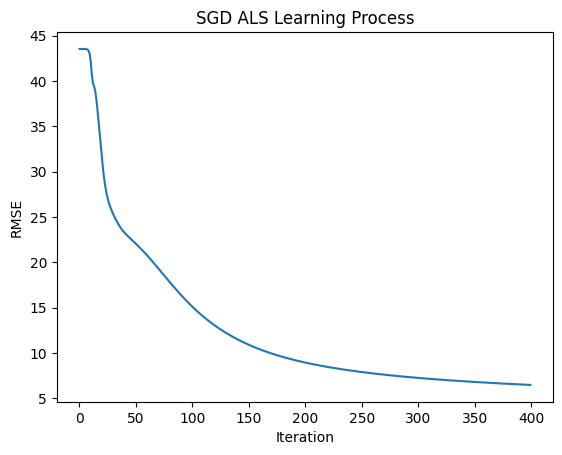

In [222]:
import matplotlib.pyplot as plt
plt.plot(errors)
plt.title('SGD ALS Learning Process')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

In [251]:
print(user_item_matrix_np[0,29], user_item_matrix_np[0,98], user_item_matrix_np[0,136], user_item_matrix_np[1,24], user_item_matrix_np[1,30], user_item_matrix_np[1,33])
user_item_matrix_np[1,30:33]

10.0 37.0 5.0 33.0 11.0 38.0


array([11.,  0.,  0.])

In [252]:
print(predictions[0,29], predictions[0,98], predictions[0,136], predictions[1,24], predictions[1,30], predictions[1,33])

11.038184152877223 36.6863174848755 7.293240516903269 29.142641585139007 12.27245125689286 37.642610053267866
